## Project 01: Explore Weather Trends

-------------------------

    
|   * * * * * * * * * *   | **Udacity**         | 
| -------------           |:-------------:      |
| **Nanodegree:**         | *Data Scientist*    | 
| **Student:**            | *Theresa Kocher*    |
| **Date:**               | *18th December 2018*|



* * * * * * * * * *

In this project the local weather trends in Berlin and the global weather trends are explored and visualized (Section 1 + 2). In the 3rd section the moving average is used to smooth out the lines. And in the 4th section an analysis of the local and global trends points out the similarites and differences between the local and the global weater trends and are interpreted.

**What tools did you use for each step?**
- to *extract the data* from the online database, a simple **SQL** request was used.
> SELECT * FROM city_list <br /> 
> SELECT * FROM city_data <br /> 
> SELECT * FROM global_data <br /> 
- to *filter this data* to needed rows and columns, **Python** and the **Pandas library** was used in this **Jupyter Notebook** (see section 1 + 2).
- to *process and visualize the data*, **Python** and the **Pandas and Matplotlib libraries** were used in this **Jupyter Notebook** (see section 3 + 4).

**How did you calculate the moving average?**
- I used the Pandas' function rolling(window=10).mean() which allowed me to process over the data list and compute the average over a given amount of entities considering the previous values


**What were your key considerations when deciding how to visualize the trends?**
- I wanted to visualize both trends (city and global) in one diagram to make it easier to compare them
- I tired out some different moving average amount of values. And decided for 10 years, which smoothes the data lines out but the ups and downs over the 50 or 100 years are still visible.

* * * * * * * * * *

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter for the moving average in years
moving_average_over = 10

* * * * * * * * * *

### 1. Import the Data

In [3]:
city_list = pd.read_csv('data/city_list.csv')
city_data = pd.read_csv('data/city_data.csv')
global_data = pd.read_csv('data/global_data.csv')

city_data.head(4)

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN


### 2. Raw Data Line Charts

In [4]:
# reduce data to only relevant lines (Berlin)
city_dataframe = city_data[(city_data.city == "Berlin") & (city_data.country == "Germany")]
global_dataframe = global_data

city_dataframe.head(4)

,year,city,country,avg_temp
8990,1743,Berlin,Germany,6.33
8991,1744,Berlin,Germany,10.36
8992,1745,Berlin,Germany,1.43
8993,1746,Berlin,Germany,NaN


In [5]:
# reduce data to only relevant columns
city_dataframe = city_dataframe.filter(items=['year', 'avg_temp'])
global_dataframe = global_dataframe.filter(items=['year', 'avg_temp'])

city_dataframe.head(4)

,year,avg_temp
8990,1743,6.33
8991,1744,10.36
8992,1745,1.43
8993,1746,NaN


In [6]:
# merge local and global data to only one dataframe (use only years from both data sets)
merged_data = pd.merge(city_dataframe, global_dataframe, on='year')
merged_data.columns = ['year', 'Berlin', 'Global']

merged_data.head(4)

,year,Berlin,Global
0,1750,9.83,8.72
1,1751,9.75,7.98
2,1752,4.84,5.78
3,1753,8.72,8.39


Text(0, 0.5, 'degree C')

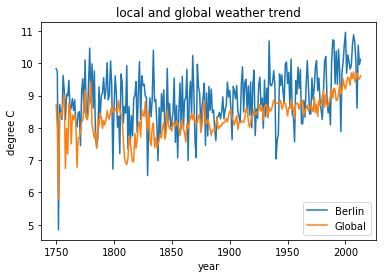

In [7]:
# plot line chart for local and global trends
local_and_global_trend = pd.DataFrame({'Berlin': list(merged_data['Berlin']),
                           'Global': list(merged_data['Global'])},
                                index=list(merged_data['year']))
lines = local_and_global_trend.plot.line()

# add title and axis names
lines.set_title('local and global weather trend')
lines.set_xlabel('year')
lines.set_ylabel('degree C')

### 3. Moving Average Line Charts

In [8]:
# compute moving average
local_and_global_trend_movingAverage = local_and_global_trend.copy()
local_and_global_trend_movingAverage['Berlin'] = local_and_global_trend['Berlin'].rolling(window=moving_average_over).mean()
local_and_global_trend_movingAverage['Global'] = local_and_global_trend['Global'].rolling(window=moving_average_over).mean()

# merge data to one dataframe
local_and_global_trend_movingAverage.head(14)

,Berlin,Global
1750,NaN,NaN
1751,NaN,NaN
1752,NaN,NaN
1753,NaN,NaN
1754,NaN,NaN
1755,NaN,NaN
1756,NaN,NaN
1757,NaN,NaN
1758,NaN,NaN
1759,8.595,8.030


The first 10 years there is no value, because no moving average could be computed. Therefor 9 previous years are needed.

Text(0, 0.5, 'degree C')

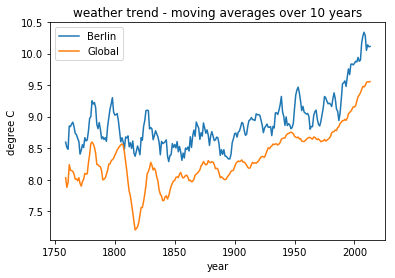

In [9]:
# plot line chart for local and global trends
local_and_global = pd.DataFrame({'Berlin': list(local_and_global_trend_movingAverage['Berlin']),
                           'Global': list(local_and_global_trend_movingAverage['Global'])},
                                index=list(merged_data['year']))

line = local_and_global.plot.line()

# add title and axis names
line.set_title('weather trend - moving averages over '+ str(moving_average_over) +' years')
line.set_xlabel('year')
line.set_ylabel('degree C')

### 4. Analysis

Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

In [10]:
hotter = 0
cooler = 0
same = 0
for i in local_and_global.index.values:
    if local_and_global.loc[i]['Berlin'] > local_and_global.loc[i]['Global']:
        hotter += 1
    elif local_and_global.loc[i]['Berlin'] < local_and_global.loc[i]['Global']:
        cooler += 1
    else:
        same += 1

print("Berlin is hotter than Global in ", hotter, " years.")
print("Berlin is cooler than Global in ", cooler, " years.")
print("Berlin is the same temperature than Global in ", same, " years.")



Berlin is hotter than Global in  255  years.
Berlin is cooler than Global in  0  years.
Berlin is the same temperature than Global in  9  years.


In [11]:
# same for the data without moving average
hotter = 0
cooler = 0
same = 0
for i in local_and_global_trend.index.values:
    if local_and_global_trend.loc[i]['Berlin'] > local_and_global_trend.loc[i]['Global']:
        hotter += 1
    elif local_and_global_trend.loc[i]['Berlin'] < local_and_global_trend.loc[i]['Global']:
        cooler += 1
    else:
        same += 1

print("Berlin is hotter than Global in ", hotter, " years.")
print("Berlin is cooler than Global in ", cooler, " years.")
print("Berlin is the same temperature than Global in ", same, " years.")



Berlin is hotter than Global in  206  years.
Berlin is cooler than Global in  58  years.
Berlin is the same temperature than Global in  0  years.


How do the changes in your city’s temperatures over time compare to the changes in the global average?


The temperature in Berlin changes to previous year lie between  0.3689999999999998  and  -0.29100000000000037
The temperature in Global changes to previous year lie between  0.28300000000000036  and  -0.1819999999999986
The temperature in Berlin changes in average by  0.0059803149606299216
The temperature in Global changes in average by  0.006007874015748066


Text(0, 0.5, 'difference in degree C')

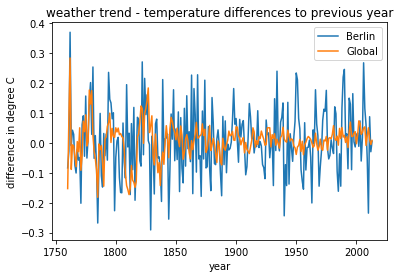

In [12]:
# compute difference to previous year (with the moving average)
temp_change = local_and_global.diff()
line = temp_change.plot.line()

print("The temperature in Berlin changes to previous year lie between ", temp_change['Berlin'].max(), " and ", temp_change['Berlin'].min())
print("The temperature in Global changes to previous year lie between ", temp_change['Global'].max(), " and ", temp_change['Global'].min())

print("The temperature in Berlin changes in average by ", temp_change['Berlin'].mean())
print("The temperature in Global changes in average by ", temp_change['Global'].mean())

# add title and axis names
line.set_title('weather trend - temperature differences to previous year')
line.set_xlabel('year')
line.set_ylabel('difference in degree C')

What does the overall trend look like? Is the world getting hotter or cooler? 

The temperature in Berlin changes in average by  0.34856129032258076  every 100 year
The temperature in Global changes in average by  0.4637806451612916  every 100 year
The world is getting hotter.


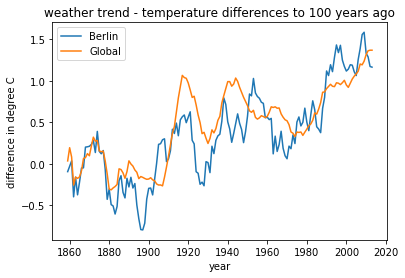

In [13]:
# compute difference to previous year (with the moving average)
temp_change = local_and_global.diff(periods=100)
line = temp_change.plot.line()

# add title and axis names
line.set_title('weather trend - temperature differences to 100 years ago')
line.set_xlabel('year')
line.set_ylabel('difference in degree C')

print("The temperature in Berlin changes in average by ", temp_change['Berlin'].mean(), " every 100 year")
print("The temperature in Global changes in average by ", temp_change['Global'].mean(), " every 100 year")

if temp_change['Global'].mean() > 0:
    print("The world is getting hotter.")
elif temp_change['Global'].mean() < 0:
    print("The world is getting cooler.")
else:
    print("There is no climate change.")

Has the trend been consistent over the last few hundred years?

In [14]:
print("The temperature in Global changes to previous year lie between ", temp_change['Global'].min(), " and ", temp_change['Global'].max())

if temp_change['Global'].min() < 0 and temp_change['Global'].max() > 0:
    print("No, because there are positive and negative changes.")

else:
    print("Yes, because there is only positive or negative changes over the years.")

The temperature in Global changes to previous year lie between  -0.3130000000000024  and  1.3670000000000044
No, because there are positive and negative changes.
